In [1]:
import cvxpy as cp
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
# Load config file
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)

# Load data
data = pd.read_csv(config["Prices_path"], index_col=0)
data.index = pd.to_datetime(data.index)
stocks_to_remove = ['KRI', 'BOL', 'BLS', 'CIN', 'PBG', 'SOV', 'BMC', 'HNZ']
data.drop(stocks_to_remove, axis=1, inplace=True)

In [3]:
global_returns = data.pct_change()
global_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
global_returns.fillna(0, inplace=True)

# Calculate the average return of each stock for every month in the data
monthly_returns = global_returns.resample('M').mean()

# Focus on the year 2019
monthly_returns_2019 = monthly_returns.loc['2019']
monthly_returns_2019.index = monthly_returns_2019.index.month_name()

# Create a column out of the index
monthly_returns_2019.reset_index(inplace=True)

monthly_returns_2019 = monthly_returns_2019.melt(id_vars='Date', var_name='Stock', value_name='Return')
monthly_returns_2019

,Date,Stock,Return
0,January,A,0.005861
1,February,A,0.002333
2,March,A,0.000650
3,April,A,-0.000947
4,May,A,-0.006742
...,...,...,...
6631,August,ZTS,0.004586
6632,September,ZTS,-0.000656
6633,October,ZTS,0.001282
6634,November,ZTS,-0.002894


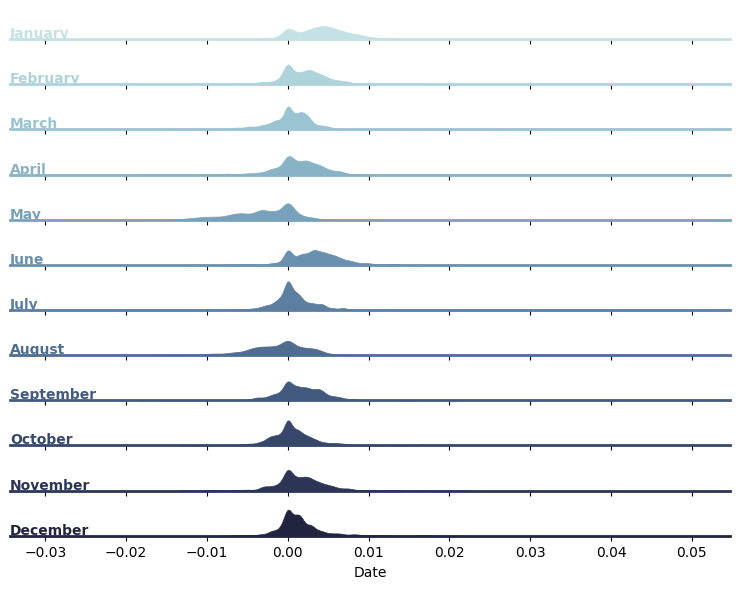

In [44]:
pal = sns.cubehelix_palette(n_colors=12, rot=-.2)
g = sns.FacetGrid(monthly_returns_2019, row="Date", hue="Date", palette=pal, aspect=15, height=.5)
g.map(sns.kdeplot, "Return",bw_adjust=0.5, linewidth=0.5, clip_on=False, fill=True, alpha=1)


g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
g.figure.subplots_adjust(hspace=-.25)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Date")